# <b>Introduction to Statistical Learning, 2nd Edition</b>
## by James, Witten, Hastie, Tibshirani

### notes by Melis Tekant

## Chapter 3 - Linear Regression

Linear regression is a staple method for quantitative prediction, and many modern learning approaches are extensions of this method. A linear relationship is modeled as:

$Y = \beta_0 + \beta_1 X$

In measuring the fit, the most common approach minimizes least squares.

Let's use the $\bf{Advertising}$ data:

In [205]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm

In [161]:
advertising = pd.read_csv('/Users/melistekant/Documents/Python Projects/ISLR2/Advertising.csv')
advertising = advertising.drop(columns = 'Unnamed: 0', axis =1)
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


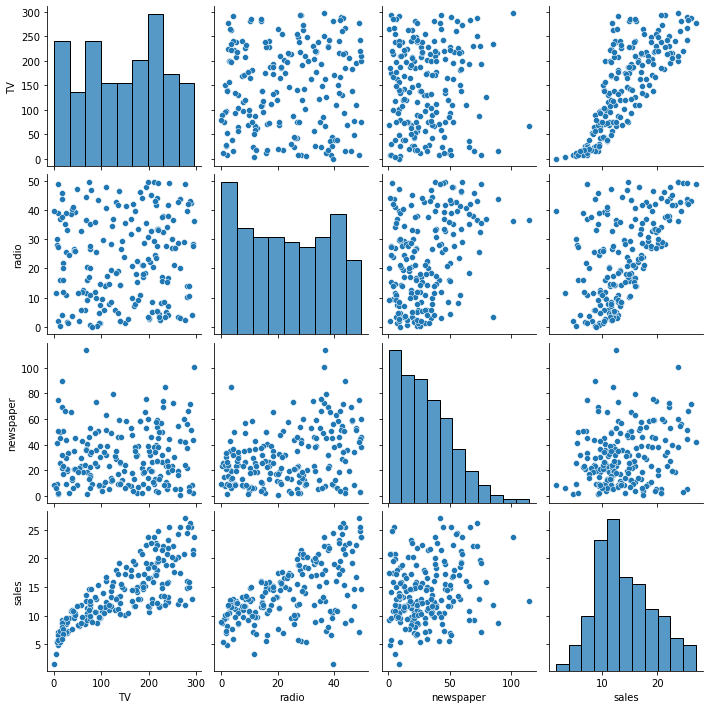

In [4]:
sns.pairplot(advertising)

Say we consider sales vs. TV:

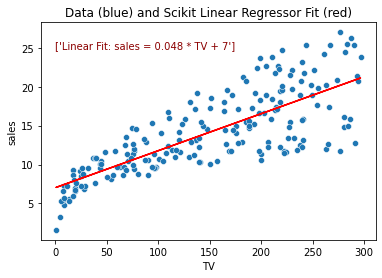

In [5]:
sns.scatterplot(y = advertising.sales,x = advertising.TV)

from sklearn.linear_model import LinearRegression
X = advertising[['TV']]
y = advertising[['sales']]
regress = LinearRegression()
regress.fit(X,y)
y_pred = regress.predict(X)
plt.plot(X,y_pred,color = 'red')
plt.title('Data (blue) and Scikit Linear Regressor Fit (red)');
inter = regress.intercept_
slope = regress.coef_
graphtext = '{float(slope)}*TV+ {int(inter)}'
plt.text(0,25,['Linear Fit: sales = '+ str(round(float(slope),3))+ ' * TV + '+ str(int(inter))],color='darkred');


Now let's calculate the residual sum of squares (RSS) of various combinations of $\beta_0$ and $\beta_1$, the two linear fit parameters.

(Here we will actually calculate MSE, which is closely related to RSS.)

In [117]:
from sklearn.metrics import mean_squared_error

b0,b1 = np.mgrid[5:9:0.1,0.02:0.07:0.001]
pos = np.dstack((b0,b1))
msevals = np.zeros(np.shape(pos[:,:,1]))
for i in b0[:,0]:
    idxi = np.where(b0[:,0] == i)
    for j in b1[0,:]:
        idxj = np.where(b1[0,:] == j)
        ypred = j* X.values + i
        msevals[int(idxi[0]),int(idxj[0])] = mean_squared_error(y,ypred)

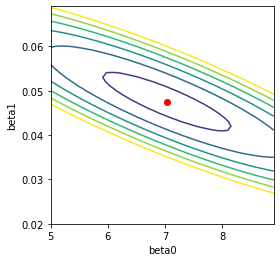

In [118]:
plt.figure(figsize=(4,4))
plt.contour(b0,b1,msevals,levels = np.linspace(10,15,7));
plt.scatter(inter,slope,color='r')
plt.xlabel('beta0')
plt.ylabel('beta1');

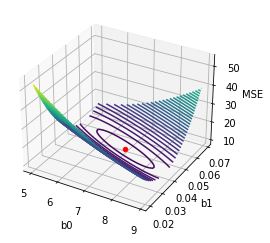

In [119]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(b0,b1,msevals,50)
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('MSE')
ypred = slope* X.values + inter
bestmse = mean_squared_error(y,ypred)
ax.scatter(inter,slope,bestmse,color='r');

The least squares coefficient estimate for simple linear regression is an unbiased estimator, meaning that the estimator does not systematically over or under-estimate the true parameter, when the experiment is repeated many times. The standard error of the value $\hat \mu$, the amount that we can expect it to defer from the real value $\mu$, is

$Var(\hat \mu) = SE(\hat \mu)^2 = \frac{\sigma^2}{n},$

where $\sigma$ is the std of each $y_i$, provided that the n observations are uncorrelated. So, the more observations we make, the closer $\hat \mu$ will be to the true value $\mu$. 

If $\sigma$ is not known, it can be esimated from the data, in which case, it is referred to as residual standard error. 

$RSE = \sqrt{\frac{RSS}{n-2}}.$

Starting from this value, we can calculate confidence intervals, the range of values such that with X% probability the true value of the parameter is contained within the given range. 

For linear regression, assuming Gaussian errors, 95% confidence interval of $\beta_1$ is $\hat \beta_1 \pm 2 \cdot SE(\hat \beta_1).$ (interchange $\beta_1$ for $\beta_0$ for the intercept)

For the data discussed above, the 95% confidence intervals for $\beta_0$ and $\beta_1$ are:

In [120]:
RSS = np.sum((y - ypred)**2)
rse = np.sqrt(RSS / (len(y) - 2))

In [129]:
rse_b0 = rse*np.sqrt(1/len(X.values)+np.mean(X.values)**2/np.sum((X.values-np.mean(X.values))**2))
print(inter - 2*float(rse_b0))
print(inter + 2*float(rse_b0))


[6.11690767]
[7.94827943]


In [145]:
rse_b1 = rse*np.sqrt(1/np.sum((X.values-np.mean(X.values))**2))
print(slope - 2* float(rse_b1))
print(slope + 2* float(rse_b1))

[[0.04215543]]
[[0.05291785]]


Standard errors can be used for hypothesis testing (e.g. testing null hypothesis vs alternative hyposheses). For the simple linear model, we just need to see if $\hat \beta_1$ is sufficiently far from 0. $SE(\hat \beta_1)$ plays a crucial role. If SE is large, then $\hat \beta_1$ must be far from 0 to convincingly be able to reject the null hypothesis. For small SE, $\hat \beta_1$ can be small. 

To measure the number o standard deviations away from 0 $\hat \beta_1$ is, compute a t-statistic.

$ t = \frac{\hat \beta_1-0}{SE(\hat \beta_1)}$



For no dependence between x and y, t has n-2 degrees of freedom, which, for n>30 is similar to a normal distribution. The probability of observing a number $\geq |t|$, assuming $\beta_1 = 0$ is called the p-value. For small p-values, null hypothesis can be rejected, since seeing an association between X and Y in the absence of one is highly unlikely. Generally 1% or 5% is used as a cutoff for p-values for null hypothesis rejection. 

In [171]:
t_b0 = inter/rse_b0
t_b1 = float(slope)/rse_b1
pval_0 = float(1-norm.cdf(t_b0))
pval_1 = float(1-norm.cdf(t_b1))
print("T-statistic for b_0 is "+ (str(float(t_b0))) + "so the p-value is " + str(pval_0) + ".")
print("T-statistic for b_1 is "+ (str(float(t_b1))) + "so the p-value is " + str(pval_1) + ".")

T-statistic for b_0 is 15.360275174117541so the p-value is 0.0.
T-statistic for b_1 is 17.667625600875546so the p-value is 0.0.


I think we can reject the null ypothesis pretty confidently for both variables.

Now let's look at metrics that reveal how well the model fits the data: the residual standard error (RSE) and $R^2$ statistic.

$ RSE = \sqrt{\frac{1}{n-2} RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n} (y_i-\hat y_i)^2}$ reveals the average amount that the data deviates away from the true regression line, the 'lack of fit' of the model.

The Y scale independent value, $R^2 = 1- \frac{RSS}{TSS} $, where TSS is the total sum of squares $\sum (y_i - \bar y)^2,$ the variance of Y.

TSS gives the variability inherent in the sample, and RSS the amount that is unaccounted for by the regression. Thus, $R^2$ statistic is the proportion of Y variability that is explained using X. $R^2$ statistic takes on values between 0 and 1, with 1 signifying that the regression can explain the variability well, and 0 not. A low value can come from either the linear model being an ill-suiting model to explain the data or that the data variance is high. 

In [180]:
TSS = np.sum((y - np.mean(y))**2)
print('For this advertising data, the RSE is ' + str(float(rse)) + ' and the R^2 statistic is ' + str(float(1-RSS/TSS))+ '.')


For this advertising data, the RSE is 3.258656368650463 and the R^2 statistic is 0.611875050850071.


#### Multiple Linear Regression

For situations where there are multiple predictors, one cannot use a simple linear regression. Instead of performing multiple simple linear regression, we can model all the predictiors together in a multiple linear regression model:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... +\beta_p X_p + \epsilon $

where $X_i$'s are the predictors and the $\beta_i$'s correspond to the coefficients associated with each predictor, holding all other variables constant. 

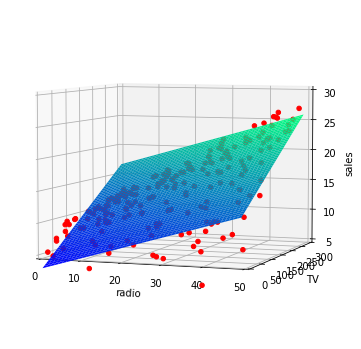

In [351]:
X = advertising[['TV','radio','newspaper']]
y = advertising[['sales']]
regress = LinearRegression()
regress.fit(X,y)
y_pred = regress.predict(X)
fig = plt.figure(figsize=(6,20))
ax = fig.gca(projection = '3d')
ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('sales')
inter = regress.intercept_
slopes = regress.coef_
Xes = np.arange(0,50, 1)
Ys = np.arange(0,300, 1)
Xes, Ys = np.meshgrid(Xes, Ys)
Zmodel = inter + slopes[:,1]*Xes + slopes[:,0]*Ys

surf = ax.plot_surface(Xes,Ys,Zmodel,cmap = cm.winter,alpha=1)
ax.scatter(X['radio'],X['TV'],y,color = 'r',alpha=1)

ax.azim = -70
ax.dist = 10
ax.elev = 5

ax.set_xlim([0,50])
ax.set_ylim([0,300])
ax.set_zlim([5,30])

plt.show()



In [368]:
print('Intercept = ' + str(inter))
print('Slopes (TV, radio, newspaper) = ' + str(slopes))

Intercept = [2.93888937]
Slopes (TV, radio, newspaper) = [[ 0.04576465  0.18853002 -0.00103749]]


In [371]:
reduced_ad=advertising[{'TV','radio','newspaper','sales'}]
reduced_ad.corr()

,newspaper,radio,sales,TV
newspaper,1.000000,0.354104,0.228299,0.056648
radio,0.354104,1.000000,0.576223,0.054809
sales,0.228299,0.576223,1.000000,0.782224
TV,0.056648,0.054809,0.782224,1.000000


In [376]:
RSS = np.sum(np.square(y-y_pred))
rse = np.sqrt(RSS/(len(y)-2))
TSS = np.sum((y - np.mean(y))**2)
p=3
Rsq=1-RSS/TSS
F = (TSS-RSS)/p /(RSS/(len(y)-p-1))
print('RSE = ' + str(float(rse)))
print('R^2 = ' + str(float(Rsq)))
print('F-statistic = ' + str(float(F)))

RSE = 1.6769760888385674
R^2 = 0.8972106381789522
F-statistic = 570.2707036590942


All predictors so far have been quantitative data. What about qualitative predictors? Those with only two levels?

In that case, create a dummy variable that takes on the value 0 or 1, and use it in the regression equation. Can also use -1 or 1. One would simply need to adjust the model to account for the choice. 


In [378]:
credit = pd.read_csv('/Users/melistekant/Documents/Python Projects/ISLR2/Credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


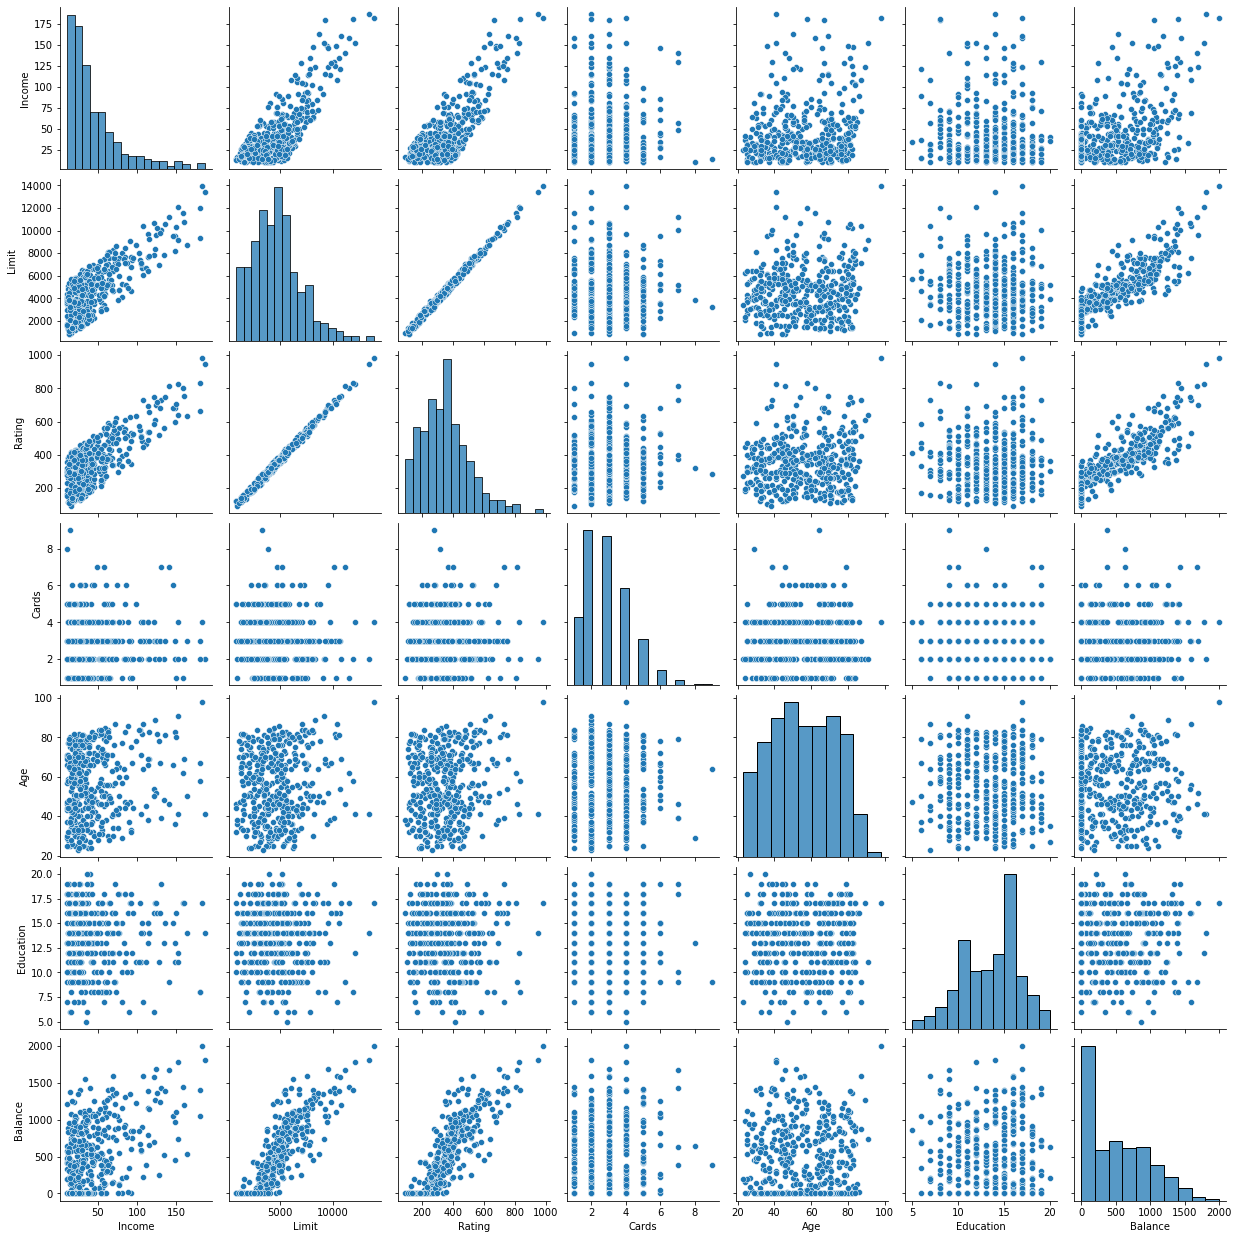

In [379]:
sns.pairplot(credit)

In [511]:
X = credit[['Own']]
X = X.replace(to_replace =['Yes','No'],value = [1,0])
y = credit[['Balance']]
regress.fit(X.values,y)
y_pred = regress.predict(X)
inter = regress.intercept_
slope = regress.coef_
RSS = np.sum(np.square(y-y_pred))
rse = np.sqrt(RSS/(len(y)-2))
rse_b0 = rse*np.sqrt(1/len(X.values)+np.mean(X.values)**2/np.sum((X.values-np.mean(X.values))**2))
rse_b1 = rse*np.sqrt(1/np.sum((X.values-np.mean(X.values))**2))
t_b0 = inter/rse_b0
t_b1 = float(slope)/rse_b1
pval_0 = float(1-norm.cdf(t_b0))
pval_1 = float(norm.cdf(t_b1))

d = {1: ["Intercept", inter, rse_b0, t_b0, pval_0],2:["Own (yes)", slope, rse_b1, t_b1,pval_1]}
print ("{:<12} {:<12} {:<12} {:<12} {:<12}".format("Parameter",'Coefficient','Std. Error','t-statistic','p-value'))
for k, v in d.items():
    name, coef,std,tstat,pval = v
    print ("{:<12} {:<12} {:<12} {:<12} {:<12}".format(name,round(float(coef),3),round(float(std),3),round(float(tstat),3),round(float(pval),3)))

Parameter    Coefficient  Std. Error   t-statistic  p-value     
Intercept    509.803      33.128       15.389       0.0         
Own (yes)    19.733       46.051       0.429        0.666       


In [546]:
x1 = credit[['Region']]
x1 = x1.replace(to_replace =['South','North','East','West'],value = [1,0,0,0])
x2 = credit[['Region']]
x2 = x2.replace(to_replace = ['West','East','North','South'],value =[1,0,0,0])
x1 = x1.rename(columns = {'Region':'Region South'})
x2 = x2.rename(columns = {'Region':'Region West'})
X = pd.concat([x1,x2],axis=1)
y = credit[['Balance']]
regress.fit(X.values,y)
y_pred = regress.predict(X)
inter = regress.intercept_
slope = regress.coef_

d = {1: ["Intercept", inter],2:["Region (West)", slope[:,0]],3:["Region (South)", slope[:,1]]}
print ("{:<15} {:<12}".format("Parameter",'Coefficient'))
for k, v in d.items():
    name, coef = v
    print ("{:<15} {:<12} ".format(name,round(float(coef),3)))


Parameter       Coefficient 
Intercept       531.0        
Region (West)   -12.503      
Region (South)  -18.686      


Though easily interpretable, the linear model is quite rigid. It assumes that the different predictors display no synergistic behavior (interaction effect in stats. This also seems analogous to cooperativity in biochemistry). In the real world, this assumption might not hold in many cases. To relax this assumption, we add an interaction term. Take a two variable model $Y = f(X_1,X_2)$

$Y = \beta_0+ \beta_1 X_1 +\beta_2 X_2 + \beta_3 X_1 X_2 +\epsilon$ has the interaction term associated with $\beta_3$, coupling the two variables $X_1$ and $X_2$. 